<a href="https://colab.research.google.com/github/Toothpastefairy/pokemon-essentials/blob/master/comp_multiphase_flow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Functions

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse as sp
import scipy.sparse.linalg as la

def calc_mu(mu_0,Ny):
  #returns array of mu over the whole space
  return mu_0 * np.ones(Ny+2)


# def calc_vt(velocity, y):
#   global Ny, dy
#   l = Pr_length(velocity, y)
#   vt = np.zeros(Ny+2)
#   vt[1:-1] = l**2 * np.abs((velocity[:-2] - velocity[2:]) / dy)
#   return vt


# def Pr_length(velocity, y):
#   prantl_length = np.zeros(len(velocity))
#   wall_mask = (y < 0.2 * DELTA) + (y > 0.8 * DELTA)
#   center_mask = (wall_mask == 0)
#   prantl_length[wall_mask] = k * y[wall_mask] # 0.4
#   prantl_length[center_mask] = labda * y[center_mask] #0.1
#   return prantl_length[1:-1]


def diagonal_A(mu, boundary_Condition,dy,vt):
  diag_A = np.ones(len(mu))
  diag_A[1:-1] = mu[2:] + 2* mu[1:-1] + mu[:-2] #- (vt[2:] + 2* vt[1:-1] + vt[:-2])
  diag_A[0] = boundary_Condition[0] * dy
  diag_A[-1] = boundary_Condition[1] * dy
  return diag_A


def diagonal_B(mu,dy,vt):
  diag_B = np.zeros(len(mu)-1)
  diag_B = -1*(mu[:-1] + mu[1:] )#- vt[:-1] + vt[1:])
  diag_B[-1] = 1*dy
  return diag_B


def diagonal_C(mu,dy,vt):
  diag_C = np.zeros(len(mu)-1)
  diag_C = -1*(mu[:-1] + mu[1:] )#- vt[:-1] + vt[1:])
  diag_C[0] = 1*dy
  return diag_C


def TDMAsolver(a, b, c, d):
    # copying the arrays so they can be overwritten
    ac = np.copy(a)
    bc = np.copy(b)
    cc = np.copy(c)
    dc = np.copy(d)

    xc = np.zeros(len(bc))

    for i in range(1, len(d)):
        mc = ac[i-1]/bc[i-1]
        bc[i] = bc[i] - mc*cc[i-1] 
        dc[i] = dc[i] - mc*dc[i-1]
        	    
    xc = bc
    xc[-1] = dc[-1]/bc[-1]

    for i in range(len(d)-2, -1, -1):
        xc[i] = (dc[i]-cc[i]*xc[i+1])/bc[i]
    return xc


def simulate(boundary_Condition, mu, pressure_dif, press_bound, vt):
    global dy
    
    # Calculating the diago nals
    diag_A = diagonal_A(mu, boundary_Condition, dy, vt) / dy
    diag_B = diagonal_B(mu,dy, vt) / dy
    diag_C = diagonal_C(mu,dy, vt) / dy

    # Filling the diagonals into the matrix for comparison
    matrix_A = 1/(rho) * sp.diags(diagonals=(diag_A, diag_B, diag_C), offsets=(0,-1,1))
    matrix_A = sp.dia_matrix(matrix_A)
    A = np.diag(diag_A, k=0) + np.diag(diag_B, k=-1) + np.diag(diag_C,k=1)

    # Calculating the pressure difference
    pressure_difference = pressure_dif * np.ones((Ny+2))
    pressure_difference[0] = 2*press_bound[0]
    pressure_difference[-1] = 2*press_bound[1]
    
    solution = la.spsolve(matrix_A,pressure_difference)
    #solution = TDMAsolver(diag_B, diag_A, diag_C, pressure_difference)

    return solution

# Find The Laminar Solution


velocity gradient is 0 at wall 1, velocity set at wall 2
velocity is 0 at wall


/usr/local/lib/python3.7/dist-packages/scipy/sparse/linalg/dsolve/linsolve.py:138: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  SparseEfficiencyWarning)
/usr/local/lib/python3.7/dist-packages/scipy/sparse/linalg/dsolve/linsolve.py:138: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  SparseEfficiencyWarning)


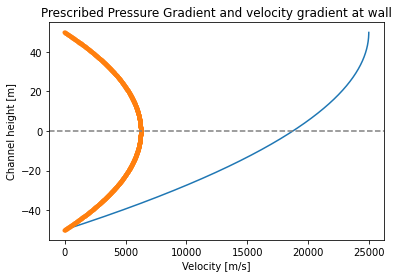

prescribed shear stress at wall


/usr/local/lib/python3.7/dist-packages/scipy/sparse/linalg/dsolve/linsolve.py:138: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  SparseEfficiencyWarning)


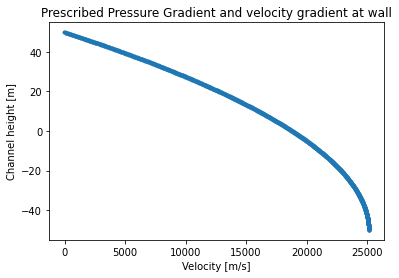

velocity is 0 at wall, laminar solution


/usr/local/lib/python3.7/dist-packages/scipy/sparse/linalg/dsolve/linsolve.py:138: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  SparseEfficiencyWarning)


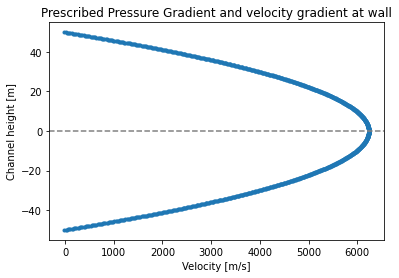

In [ ]:
# Define the grid
Ny = 1000
y_end = 100
dy = y_end/(Ny + 2)
y = np.arange(-y_end/2,y_end/2,dy)

# Define flow parameters
rho = 1
mu_0 = 1#1.3e-3
Pressure_difference = 1
press_bound = [4, 4]
vt = 0

mu = calc_mu(mu_0,Ny)

# # velocity gradient is 0 at wall
print("velocity gradient is 0 at wall 1, velocity set at wall 2")
boundary_Condition = [1,-1]
press_bound = [0, 0]
solution = simulate(boundary_Condition, mu, Pressure_difference, press_bound, vt)
plt.plot(solution[1:-1],y[1:-1])

# # velocity is 0 at wall
print("velocity is 0 at wall")
boundary_Condition = [1, 1]
solution = simulate(boundary_Condition, mu, Pressure_difference, press_bound, vt)
plt.title("Prescribed Pressure Gradient and velocity gradient at wall")
plt.xlabel('Velocity [m/s]')
plt.ylabel('Channel height [m]')
plt.plot(solution,y, '.')
plt.axhline(0, color='grey', linestyle='dashed')
plt.show()

# prescribed shear stress at wall
print("prescribed shear stress at wall")
stress = 1
boundary_Condition = [-1, 1]
press_bound = [-stress*dy/mu[0], 0]
solution = simulate(boundary_Condition, mu, Pressure_difference, press_bound, vt)
plt.title("Prescribed Pressure Gradient and velocity gradient at wall")
plt.xlabel('Velocity [m/s]')
plt.ylabel('Channel height [m]')
plt.plot(solution,y, '.')
plt.show()

# Prescribed flow rate

# First, solve the laminar solution
print("velocity is 0 at wall, laminar solution")
boundary_Condition = [1, 1]
vt = np.zeros(Ny+2)
velocity = simulate(boundary_Condition, mu, Pressure_difference, press_bound, vt)
# plt.title("Prescribed Pressure Gradient and velocity gradient at wall")
# plt.xlabel('Velocity [m/s]')
# plt.ylabel('Channel height [m]')
# plt.plot(velocity, y, '.')
# plt.axhline(y_end/2, color='grey', linestyle='dashed')
# plt.show()

error = np.infty
errors = np.array([])
i=-1
while error > 0.01: #or something like that
    i+=1
    velocity_old = np.copy(velocity)

    # recalculate the velocity and error from this
    velocity = simulate(boundary_Condition, mu, Pressure_difference, press_bound, vt)
    error = np.linalg.norm(velocity_old - velocity) / np.linalg.norm(velocity)
    errors = np.append(errors, error)
    if i>=500: 
      print("on nyo, it's bwoken")
      break


plt.title("Prescribed Pressure Gradient and velocity gradient at wall")
plt.xlabel('Velocity [m/s]')
plt.ylabel('Channel height [m]')
plt.plot(velocity, y, '.')
plt.axhline(0, color='grey', linestyle='dashed')
plt.show()



# Add Prandtl mixing length

In [ ]:
# Adding Prantl Mixing Length

def calc_mu_Prandtl(y, velocity, rho, mu_0, Ny, argument_type):
  # Returns array of mu over the whole space
  mixing_length = mixing_length_func(y, velocity, rho, mu_0, argument_type)
  
  # Determine the velocity gradient
  velocity_diff = (velocity[2:] - velocity[:-2]) / (y[2:] - y[:-2])
  velocity_diff = np.append(velocity_diff, velocity_diff[-1])
  velocity_diff = np.append(velocity_diff[0], velocity_diff)

  # Calculate the effective viscosity
  mu_eff = rho * mixing_length**2 * np.abs(velocity_diff)

  return mu_0 * np.ones(Ny+2) + mu_eff


def mixing_length_func(y, velocity, rho, mu_0, argument_type):
  global y_end, dy, Pressure_difference
  # Use the practical definition for the boundary layer thickness
  y_wall = -np.abs(y)+y_end/2

  delta99 = y_wall[np.max(velocity) * 0.99 < velocity]
  delta99 = delta99[0]
  # delta99 = y_end / 2
  
  # Known constants
  labda = 0.09
  kappa = 0.41
  A = 26

  # Calculate stresses in different ways
  tau_s = np.abs((velocity[1] - velocity[0]) / dy)
  tau = tau_s + Pressure_difference * y_wall
  tau_plus = tau / tau_s
  
  y_plus = y_wall * np.sqrt(tau_s * rho) / mu_0
  
  # Away from the boundary
  lm = labda * delta99 * np.ones(len(velocity))

  # Calculate Von Driest damping types
  if argument_type == "Driest":
    argument = - y_plus / A
  elif argument_type == "Spalding":
    argument = -y_plus * np.sqrt(tau_plus) / A
  elif argument_type == "Jones":
    argument = -y_plus * tau_plus / A

  # Apply damping
  damping = (1 - np.exp(argument))

  # Close to the boundary, add Von Driest damping
  mask = y_wall/delta99 < labda/kappa
  lm[mask] = kappa * y_wall[mask]
  lm*=damping

  return lm


def solve_turbulent(argument_type):
  # First Calcuate the laminar solution
  mu = calc_mu(mu_0, Ny)
  velocity_laminar = simulate(boundary_Condition, mu, Pressure_difference, press_bound, vt)

  velocity_new = velocity_laminar

  # Then calculate the solution with Prandtl mixing length
  eps = 0.02
  error = 1
  i = 0

  # Looping till solution converges
  while error > eps:
    velocity = velocity_new

    # Calculate new effective viscosity
    mu_Prandtl = calc_mu_Prandtl(y, velocity, rho, mu_0, Ny, argument_type)

    # Calculate ensuing velocity
    velocity_new = simulate(boundary_Condition, mu_Prandtl, Pressure_difference, press_bound, vt)

    error = np.sum(np.abs((velocity_new - velocity) / velocity))
    if i > 200:
      print("Oh nyo, it's bwoken")
      return None
  
  return velocity_new

In [ ]:
# Define the grid
Ny = 1000
y_end = 10
dy = y_end/(Ny + 2)
y = np.linspace(-(y_end + dy)/2, (y_end + dy)/2, Ny + 2)

# Define flow parameters
rho = 1
mu_0 = 1 
Pressure_difference = 1
press_bound = [4, 4]
boundary_Condition = [1, 1]
vt = 0

mu = calc_mu(mu_0,Ny)

/usr/local/lib/python3.7/dist-packages/scipy/sparse/linalg/dsolve/linsolve.py:138: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  SparseEfficiencyWarning)


0
With prandtl mixing length solution


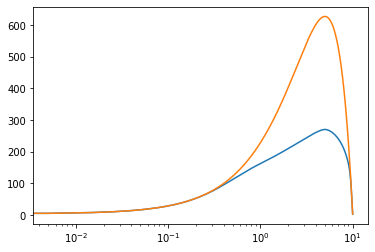

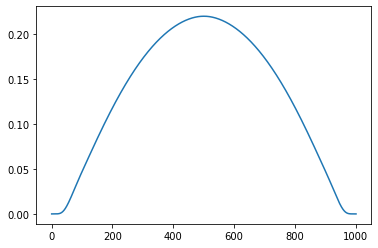

In [ ]:
# First Calcuate the laminar solution
velocity = solve_turbulent("Spalding")
velocity2 = solve_turbulent("Driest")
velocity3 = solve_turbulent("Jones")
mu = calc_mu(mu_0, Ny)
velocity_laminar = simulate(boundary_Condition, mu, Pressure_difference, press_bound, vt)
y+= y_end/2
print(i)
print("With prandtl mixing length solution")
plt.plot(y,velocity)
plt.plot(y,velocity_laminar)
plt.xscale("log")
plt.show()
plt.plot(velocity2 - velocity)


# Add Wall Functions

In [ ]:
# Define the grid
Ny = 1000
y_end = 100
dy = y_end/(Ny + 2)
y = np.linspace(-y_end/2,y_end/2,Ny+2)

# Define flow parameters
rho = 1
mu_0 = 1#1.3e-3
Pressure_difference = 1
press_bound = [4, 4]
vt = 0

# Define laminar velocity solution
mu = calc_mu(mu_0,Ny)
velocity_laminar = simulate(boundary_Condition, calc_mu(mu_0,Ny), Pressure_difference, press_bound, vt)

# Begin function
mu = (calc_mu(mu_0,Ny)) #input
u_0 = velocity_laminar #input

y_wall = -np.abs(y)+y_end/2

# Define known constants
beta_star = 0.09
E = 9.8
kappa = 0.41

# Determine kinetic energy
kp = velocity_laminar**2/np.sqrt(beta_star)

# Define initial guess
u_tau_old = (beta_star**(1/4)*np.sqrt(kp))
u_tau_new = np.ones(u_tau_old.shape)

epsilon = 2e-10
error = 10
i=0
while error > epsilon:
  U_p = simulate(boundary_Condition, mu, Pressure_difference, press_bound, vt)
  
  # Determine new u_tau
  yp_plus = y_wall*u_tau_old/mu*rho
  u_tau_new[1:-1] = U_p[1:-1]*kappa/np.log(E*yp_plus[1:-1])

  # Calculate the error
  error = np.sum(np.abs((u_tau_new - u_tau_old) / u_tau_old))

  # Update iteration values
  u_tau_old = u_tau_new

  i+=1

mu_effective = rho*u_tau_new*y_wall*kappa/np.log(E*yp_plus)
mu_effective[yp_plus<50] = yp_plus[yp_plus<50]
print(i)


/usr/local/lib/python3.7/dist-packages/scipy/sparse/linalg/dsolve/linsolve.py:138: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  SparseEfficiencyWarning)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log
  


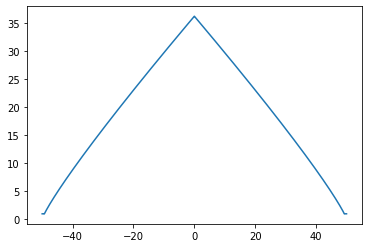

In [ ]:
tau_s = 250
E = 9.8
kappa = 0.41

# Define the grid
Ny = 10000
y_end = 100
dy = y_end/(Ny + 2)
y = np.linspace(-y_end/2,y_end/2,Ny+2)

y_wall = -np.abs(y)+y_end/2
y_plus = y_wall * np.sqrt(tau_s * rho) / mu_0

mu = calc_mu(mu_0,Ny)*y_plus/(1/kappa*np.log(E*y_plus))
mu[y_plus<11.067] = calc_mu(mu_0,Ny)[y_plus<11.067]

plt.plot(y, mu)

3


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.7/dist-packages/scipy/sparse/linalg/dsolve/linsolve.py:138: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  SparseEfficiencyWarning)


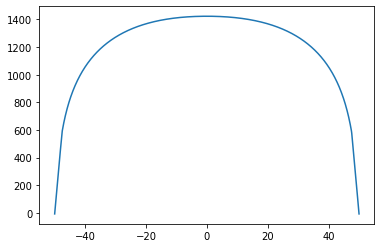

In [ ]:
tau_s = 250
E = 9.8
kappa = 0.41

# Define the grid
Ny = 1000
y_end = 100
dy = y_end/(Ny + 2)
y = np.linspace(-y_end/2,y_end/2,Ny+2)

y_wall = -np.abs(y)+y_end/2
y_plus = y_wall * np.sqrt(tau_s * rho) / mu_0

velocity_old = velocity_laminar

error = 10
epsilon = 1e-2
i=0
while error>epsilon:
  y_plus = y_wall * np.sqrt(tau_s * rho) / mu_0
  mu = calc_mu(mu_0,Ny)*y_plus/(1/kappa*np.log(E*y_plus))
  mu[y_plus<25] = calc_mu(mu_0,Ny)[y_plus<25]

  velocity_new = simulate(boundary_Condition, mu, Pressure_difference, press_bound, vt)

  tau_s = np.abs(velocity_new[1]-velocity_new[0]/dy)

  # Calculate the error
  error = np.sum(np.abs((velocity_new - velocity_old) / velocity_old))

  # Update velocity
  velocity_old = velocity_new
  i+=1

plt.plot(y, velocity_new)
print(i)

Text(0, 0.5, '$\\mu$')

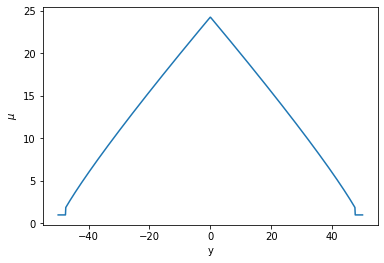

In [ ]:
plt.plot(y,mu)
plt.xlabel('y')
plt.ylabel(r'$\mu$')
#plt.plot(rho*velocity_laminar*y_wall/mu)

In [ ]:
print(2*tau_s/y_end)

2.0279009980123703


0.3295009980039905


/usr/local/lib/python3.7/dist-packages/scipy/sparse/linalg/dsolve/linsolve.py:138: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  SparseEfficiencyWarning)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':


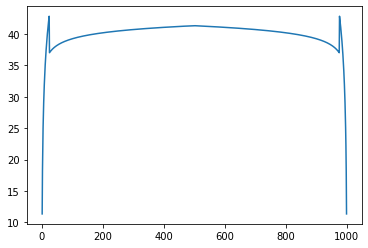

In [ ]:
# Introduce laminar velocity solution
velocity_laminar = simulate(boundary_Condition, calc_mu(mu_0,Ny), Pressure_difference, press_bound, vt)
nu = mu/rho

# Initial guess
cn = 1
tau_initial = cn*velocity_laminar[1]
u_tau_initial = np.sqrt(tau_initial/rho)
u_initial = u_tau_initial*(1/kappa*np.log(y_wall*u_tau_initial/nu)+5)
print(2*tau_initial/y_end)
plt.plot(u_initial)


tau_old = cn*velocity_laminar[1]
u_tau_old = np.sqrt(tau_initial/rho)
u_old = u_tau_initial*(1/kappa*np.log(y_wall*u_tau_initial/nu)+5)

##############
tau_w = press_bound[0]*y_end/2
u_tau = np.sqrt(tau_w/rho)
u = u_tau*(1/kappa*np.log(y_wall*u_tau/nu)+5)


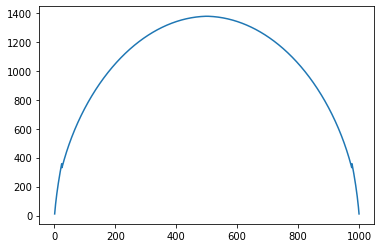

In [ ]:
plt.plot(u_initial)